# CREATING A DATABASE 😎
Scrape data from [IndianExpress News Website](https://indianexpress.com/) for diffrent topic and save it to data base.

### Collect Sports 🤾🏻‍♂️

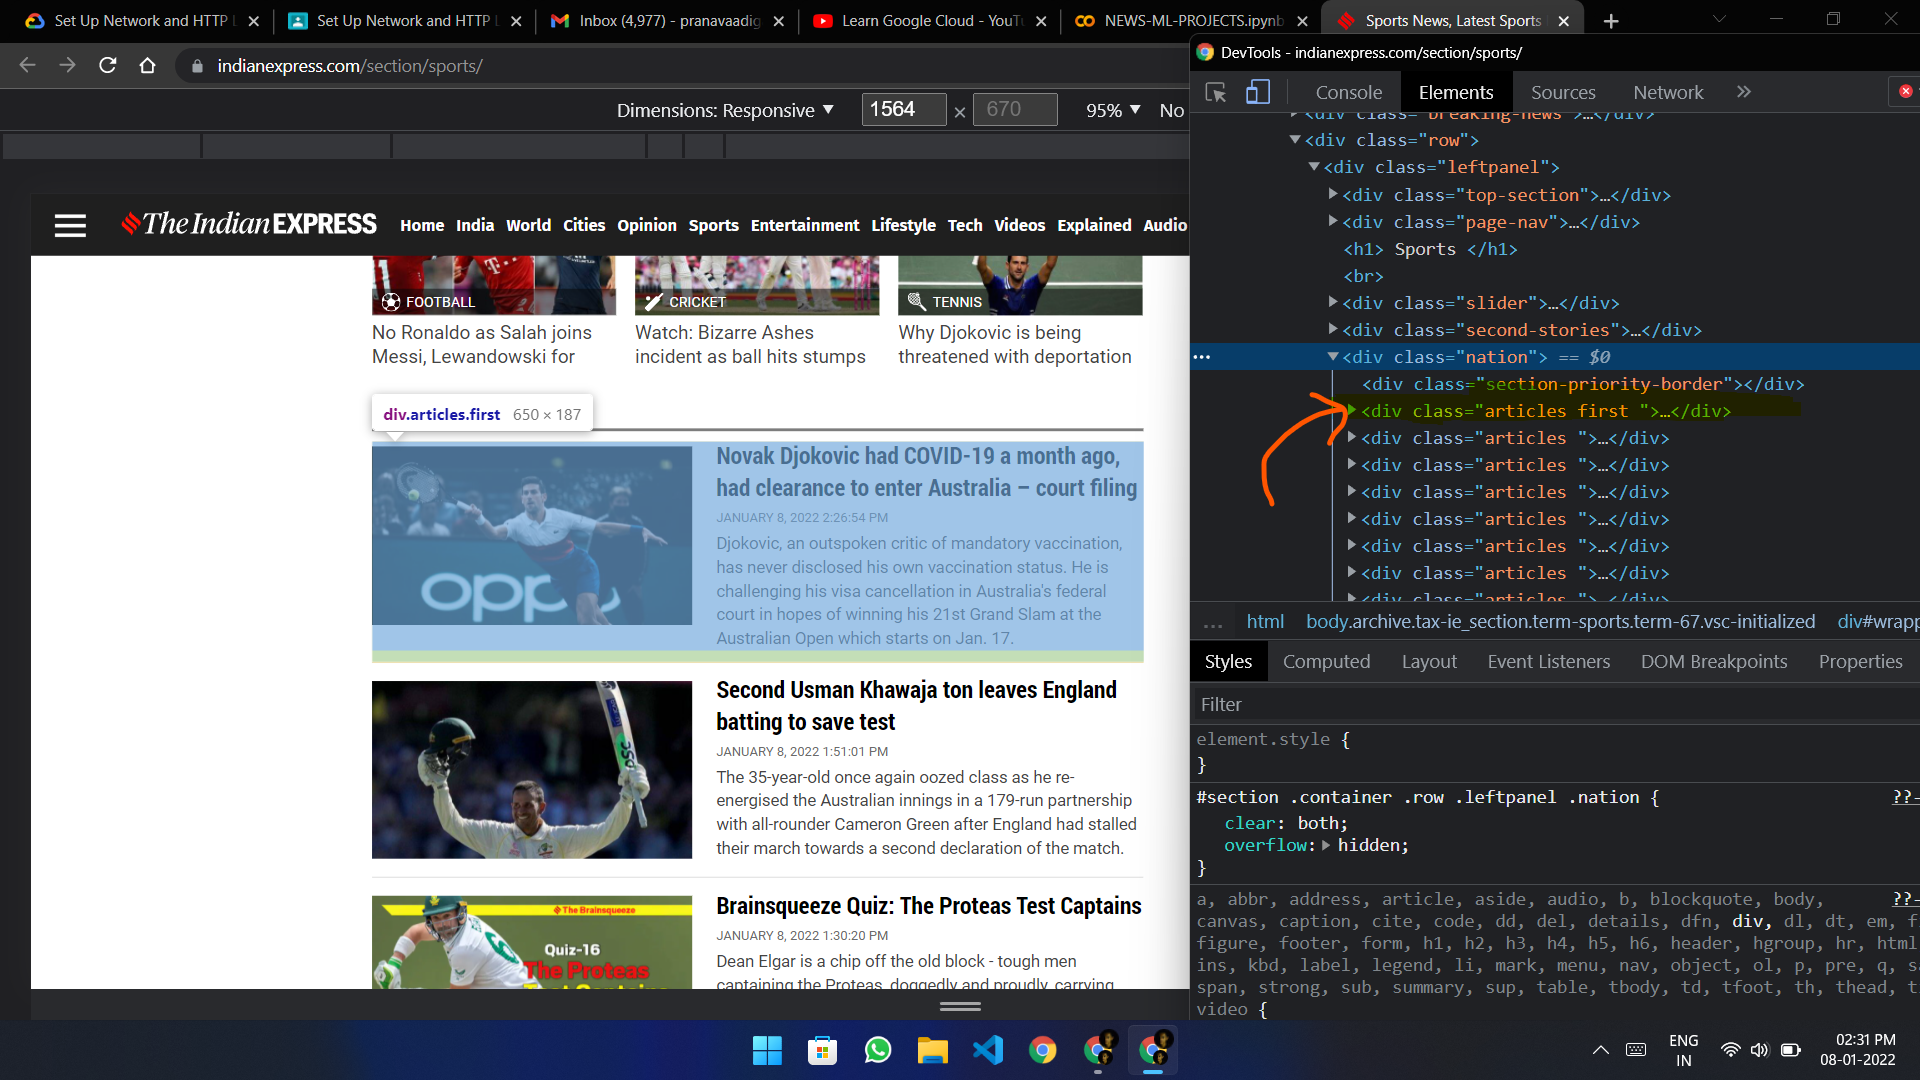

In [1]:
def collectSportsNews(): 
  URL = "https://indianexpress.com/section/sports/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
    connection.commit()
  print(news_list)

### Collect Entertainment Data 🎭

In [2]:
def collectEntertainmentData(): 
  URL = "https://indianexpress.com/section/entertainment/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
    connection.commit()
  print(news_list)

### Collect Tech Data 🧑🏻‍💻

In [3]:
def collectTechData(): 
  URL = "https://indianexpress.com/section/technology/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  # selected = soup.find('ul', attrs = {'class':'article-list'}) 
  # newss = selected.findAll('li')
  # for news in newss:
  #   c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
  for i in range(100,106):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('ul', attrs = {'class':'article-list'}) 
    newss = selected.findAll('li')
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
    connection.commit()

### Get Business Data 👨🏻‍💼

In [4]:
def collectBusinessData(): 
  URL = "https://indianexpress.com/section/business/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
    connection.commit()
  print(news_list)

### Get Educational Data 📖

In [5]:
def collectEducationData(): 
  URL = "https://indianexpress.com/section/education/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
    connection.commit()
  print(news_list)

In [6]:
def getAllInfoData():
  c.execute("SELECT Category , COUNT(*) FROM NEWS Group by Category")
  print(c.fetchall())

# Asli Game Shuru 🚩

In [7]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import os

# if db not exist then ask and scrape 
if not (os.path.isfile("News.db")): 
  print("#"*50)
  choice = input("Can I scrape the data from net? Y-n: ")
  if (choice.lower() == "y" or choice.lower() ==" yes"):
    connection = sqlite3.connect("News.db")
    c = connection.cursor()
    c.execute("""CREATE TABLE NEWS(news_article text, category text)""")
    collectSportsNews()
    collectEntertainmentData()
    collectTechData()
    collectEducationData()
    collectBusinessData()
    getAllInfoData()
  else:
    pass
else:
  connection = sqlite3.connect("News.db")
  c = connection.cursor()

### Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Connect To Database And Create A DataFrame

In [9]:
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM NEWS
                               ''', connection)

df = pd.DataFrame(sql_query, columns = ['news_article', 'category'])
# print (df)
# getAllInfoData()

### Exploring The DataSets 🔍

In [10]:
df.head()

,news_article,category
0,"Former Bengal captain Laxmi Ratan Shukla, who ...",SPORTS
1,"""Day 40 - Finished. Preet has just made histor...",SPORTS
2,Jan-Lennard Struff withstood 34 aces in a 7-6 ...,SPORTS
3,On a pitch on which Bangladesh and New Zealand...,SPORTS
4,"The matter was, however, resolved after talks ...",SPORTS


In [11]:
df.category.value_counts()

TECH             2500
BUSINESS         2475
SPORTS           2475
EDUCATION        2475
ENTERTAINMENT    2475
Name: category, dtype: int64

In [12]:
max(df["news_article"])

'🔴The top recruiters across the IITs have been American Express, Microsoft, EXL Analytics, Google, Uber, Reliance India Limited, Goldman Sachs, and Rakuten Mobile, among others.'

In [13]:
min(df["news_article"])

"\tThe Delhi University Teachers' Association had written to acting vice-chancellor Professor PC Joshi over the issue.\n"

In [14]:
df.isnull().sum()

news_article    0
category        0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lc = LabelEncoder()
df["categoryId"] = lc.fit_transform(df["category"])
df.sample(10)

,news_article,category,categoryId
8584,The 30-share BSE Sensex skidded 273.51 points ...,BUSINESS,0
11401,Computer engineering has the highest number of...,EDUCATION,1
6876,Slack’s new Clips feature lets users send shor...,TECH,4
10487,IIT Delhi has also announced PhD fellowship fo...,EDUCATION,1
1885,Rohit earned the 'Player of the Match' award f...,SPORTS,3
7893,"Addressing the fintech industry, the minister ...",BUSINESS,0
10614,The board this year registered 92.6 % overall ...,EDUCATION,1
4520,"Sai Dharam Tej, who had met with an accident i...",ENTERTAINMENT,2
6166,Apple cuts iPad production to feed chips to iP...,TECH,4
780,"Mitchell Starc, who took a key wicket in the f...",SPORTS,3


In [17]:
categoryDF = df[["category", "categoryId"]].drop_duplicates().sort_values(by="categoryId")
categoryDF

,category,categoryId
6930,BUSINESS,0
9405,EDUCATION,1
2475,ENTERTAINMENT,2
0,SPORTS,3
4950,TECH,4


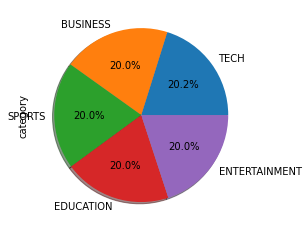

In [18]:
df["category"].value_counts().plot(kind="pie", shadow=True, autopct='%1.1f%%')

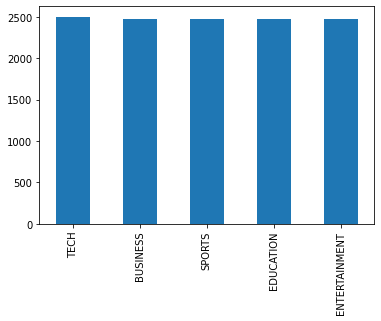

In [19]:
df["category"].value_counts().plot(kind="bar")

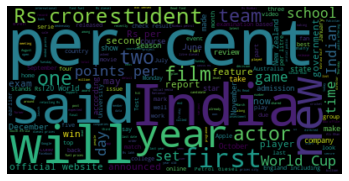

In [20]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Cleaning the datasets 🧹

#### Remove Special Characters

In [21]:
"' '".join(set(" ".join(review for review in df["news_article"])))

'h\' \',\' \'…\' \'W\' \'9\' \'Z\' \'x\' \'A\' \'\xa0\' \'y\' \'—\' \'\'\' \'D\' \'+\' \'}\' \'q\' \'g\' \'[\' \'Ç\' \'!\' \'\u200b\' \'~\' \'"\' \' \' \'d\' \';\' \'.\' \'\t\' \'`\' \'R\' \'ç\' \'2\' \'á\' \'”\' \'|\' \'*\' \'Y\' \'K\' \'°\' \'ñ\' \'7\' \'B\' \'U\' \'₹\' \'n\' \'u\' \'o\' \'/\' \'$\' \']\' \'H\' \'’\' \'f\' \'?\' \'V\' \'m\' \'F\' \'k\' \'G\' \'(\' \'\n\' \'L\' \'à\' \'_\' \'i\' \'z\' \'–\' \'4\' \'1\' \'c\' \'O\' \'Á\' \'0\' \'é\' \'“\' \'S\' \'P\' \'%\' \'3\' \'E\' \'🔴\' \'p\' \'l\' \'r\' \'I\' \':\' \'M\' \'Q\' \'8\' \'ý\' \'N\' \'€\' \'#\' \'5\' \'ó\' \'C\' \'X\' \'£\' \'@\' \'e\' \'a\' \'t\' \'J\' \'{\' \'í\' \'w\' \'s\' \'‘\' \'T\' \'-\' \')\' \'v\' \'b\' \'&\' \'6\' \'j'

In [22]:
# REMOVE SPECIAL CHARs
import re

def filterNonAscii(text):
  split = re.split("\W+", text)
  return " ".join(split)

In [23]:
df["filter1"]= df["news_article"].apply(lambda x: filterNonAscii(x.lower()))

In [24]:
"' '".join(set(" ".join(review for review in df["filter1"])))

"4' 'h' '8' 'ñ' '7' 'ý' '1' '5' 'ó' 'c' 'n' '9' '0' 'u' 'é' 'x' 'y' 'o' 'e' 'q' 'g' 'z' 'a' 't' 'f' 'í' 'w' 's' '3' ' ' 'm' 'd' 'v' 'k' 'p' 'b' 'l' 'ç' 'à' 'r' '2' '_' 'i' 'á' '6' 'j"

#### Remove Stopwords

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
def remove_stopwords(text):
  stopwords = set(nltk.corpus.stopwords.words('english'))
  stopwords.update(["br", "href"])
  text=[word for word in text.split(" ") if word not in stopwords]
  return " ".join(text)

In [27]:
df["filter1"]= df["filter1"].apply(lambda x: remove_stopwords(x))
print(df["news_article"][4])
print("-"*170)
print(df["filter1"][4])

The matter was, however, resolved after talks between players' representatives, the England and Wales Cricket Board (ECB), Cricket Australia and the Australian government.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
matter however resolved talks players representatives england wales cricket board ecb cricket australia australian government 


#### Lemmatizing the Words
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.  lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [28]:
from nltk.stem import WordNetLemmatizer
def lemmitize(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text.split(" ")])

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
df["filter2"]= df["filter1"].apply(lambda x: lemmitize(x))
print(df["news_article"][4])
print("-"*170)
print(df["filter2"][4])

The matter was, however, resolved after talks between players' representatives, the England and Wales Cricket Board (ECB), Cricket Australia and the Australian government.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
matter however resolved talk player representative england wale cricket board ecb cricket australia australian government 


In [31]:
sportsDF = df[df["category"]=="SPORTS"]
teachDF = df[df["category"]=="TECH"]
entertainmentDF = df[df["category"]=="ENTERTAINMENT"]
businessDF = df[df["category"]=="BUSINESS"]
educationDF = df[df["category"]=="EDUCATION"]

In [32]:
educationDF.sample(3)

,news_article,category,categoryId,filter1,filter2
11190,Several IITs have launched online and offline ...,EDUCATION,1,several iits launched online offline courses o...,several iits launched online offline course of...
11117,"As per the notification released by the board,...",EDUCATION,1,per notification released board candidates cbs...,per notification released board candidate cbse...
10130,AICTE-IDEA Labs are being established across t...,EDUCATION,1,aicte idea labs established across country enc...,aicte idea lab established across country enco...


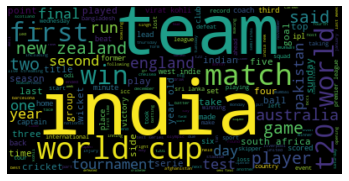

In [33]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in sportsDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

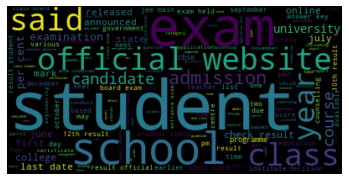

In [34]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in educationDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

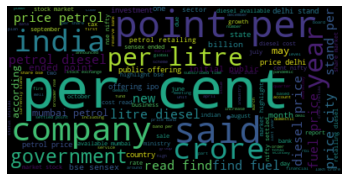

In [35]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in businessDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

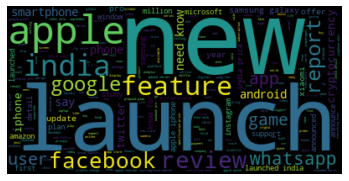

In [36]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in teachDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

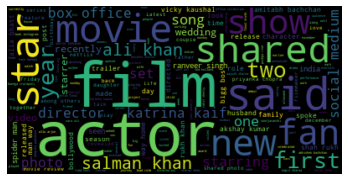

In [37]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in entertainmentDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df["filter2"].values)
y = np.array(df.categoryId.values)
cv = CountVectorizer(max_features = 6000)
x = cv.fit_transform(df.filter2).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (12400, 6000)
y.shape =  (12400,)


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

8680
3720


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Logistic Regression

In [41]:
mdl = LogisticRegression()

In [42]:
oneVsRest = OneVsRestClassifier(mdl)

oneVsRest.fit(x_train, y_train)

y_pred = oneVsRest.predict(x_test)

In [43]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

In [44]:
accuracy

94.03

In [45]:
import seaborn as sns

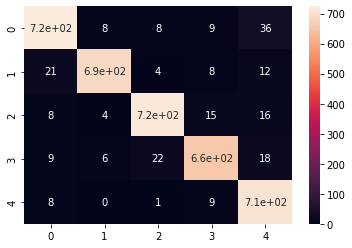

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
mdl = tree.DecisionTreeClassifier()

In [48]:
oneVsRest = OneVsRestClassifier(mdl)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)

In [49]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

In [50]:
accuracy

81.56

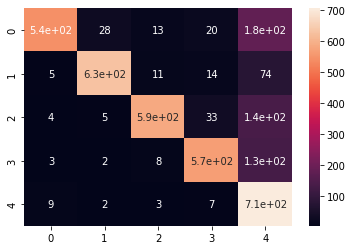

In [53]:
 sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier  
mdl = RandomForestClassifier(n_estimators= 15, criterion="entropy")    

In [73]:
oneVsRest = OneVsRestClassifier(mdl)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)

In [74]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
accuracy

90.73

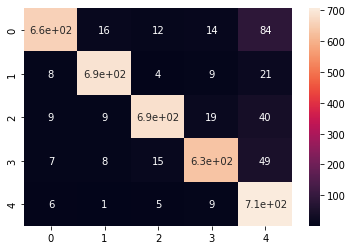

In [75]:
 sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [88]:
# from matplotlib.colors import ListedColormap  
# x_set, y_set = x_train, y_train  
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
# np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
# plt.contourf(x1, x2, oneVsRest.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
# alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
# plt.xlim(x1.min(), x1.max())  
# plt.ylim(x2.min(), x2.max())  
# for i, j in enumerate(np.unique(y_set)):  
#     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
#         c = ListedColormap(('purple', 'green'))(i), label = j)  
# plt.title('Random Forest Algorithm (Training set)')  
# plt.xlabel('Age')  
# plt.ylabel('Estimated Salary')  
# plt.legend()  
# plt.show()  

## K-Nearest Neighbor(KNN) 

In [77]:
from sklearn.neighbors import KNeighborsClassifier  
mdl= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

In [78]:
oneVsRest = OneVsRestClassifier(mdl)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)

In [79]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
accuracy

35.24

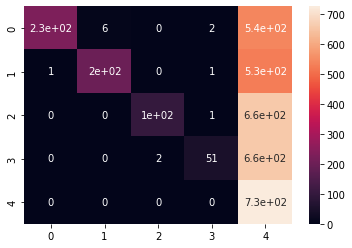

In [80]:
 sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [86]:
# from matplotlib.colors import ListedColormap 
# x_set, y_set = x_train, y_train  
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
# np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
# plt.contourf(x1, x2, oneVsRest.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
# alpha = 0.75, cmap = ListedColormap(('red','green' )))  
# plt.xlim(x1.min(), x1.max())  
# plt.ylim(x2.min(), x2.max())  
# for i, j in enumerate(np.unique(y_set)):  
#     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
#         c = ListedColormap(('red', 'green'))(i), label = j)  
# plt.title('K-NN Algorithm (Training set)')  
# plt.xlabel('news_article')  
# plt.ylabel('Category')  
# plt.legend()  
# plt.show()  